<a href="https://colab.research.google.com/github/ArincDemirel/PyTorch--Deep-Learning-Projects/blob/main/03_PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 03.PyTorch Computer Vision
https://www.learnpytorch.io/03_pytorch_computer_vision/

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [2]:
torch.__version__ , torchvision.__version__

('2.1.0+cu118', '0.16.0+cu118')

In [3]:
# Getting dataset - Fashion MNIST

In [4]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", #where to download the data
    train = True,
    download=True,
    transform= ToTensor(),
   target_transform=None
)
test_data = datasets.FashionMNIST(
    root = "data", #where to download the data
    train = False,
    download=True,
    transform= ToTensor(),
   target_transform=None
)

In [5]:
len(train_data), len(test_data), type(train_data)

(60000, 10000, torchvision.datasets.mnist.FashionMNIST)

In [6]:
image, label = train_data[0]
class_names = train_data.classes
len(class_names),class_names

(10,
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets[:5], len(train_data.targets)

(tensor([9, 0, 0, 3, 0]), 60000)

In [9]:
print(f"Image shape:{image.shape} -> [color_channels, height, width]")
print(f"Image label:{class_names[label]}")

Image shape:torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label:Ankle boot


In [10]:
# So this is a 1 color chanel which is grayscale image

(-0.5, 27.5, 27.5, -0.5)

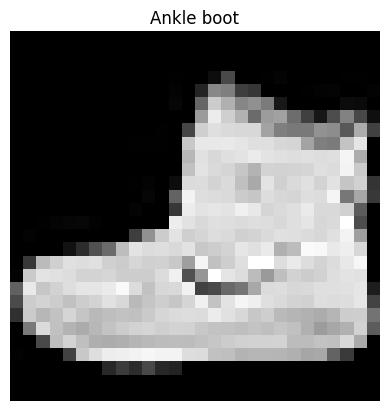

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"{class_names[label]}")
plt.axis(False)

In [12]:
random_idx = torch.randint(0, len(train_data),size=[1]).item()
random_idx

10696

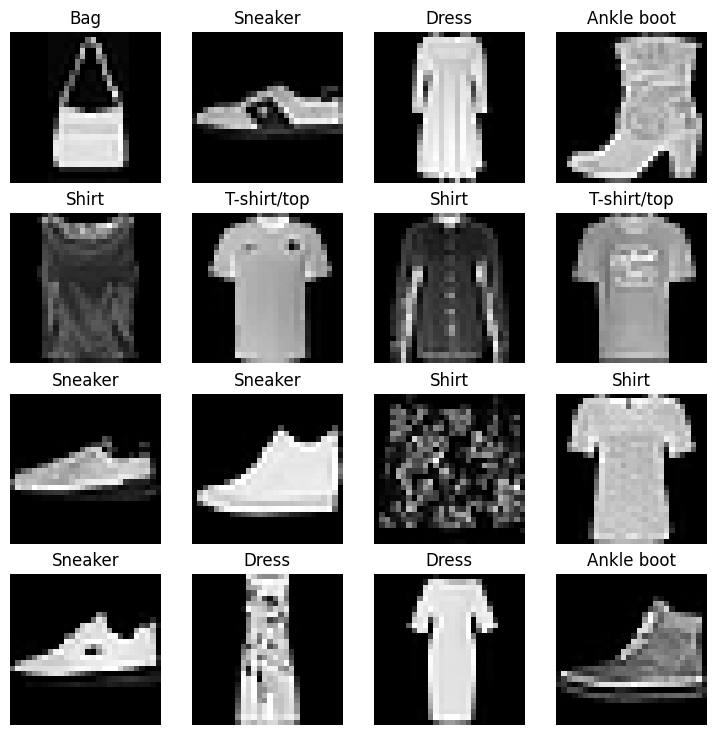

In [13]:
rows , cols = 4,4
plt.show()
fig = plt.figure(figsize=(9,9))
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data),size=[1]).item()
  new_image, label = train_data[random_idx]
  fig.add_subplot(rows, cols,i)
  plt.imshow(new_image.squeeze(), cmap="gray")
  plt.title(f"{class_names[label]}")
  plt.axis(False)

In [14]:
from torch.utils.data import DataLoader
# We have 6000 datapoints, let's do batch_size = 32, to divide into batches we can use dataloader from pytorch
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=32,
                              shuffle=False)

In [15]:
len(train_dataloader) # 1875*32 = 60000

1875

In [16]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [17]:
train_features_batch[5].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Trouser')

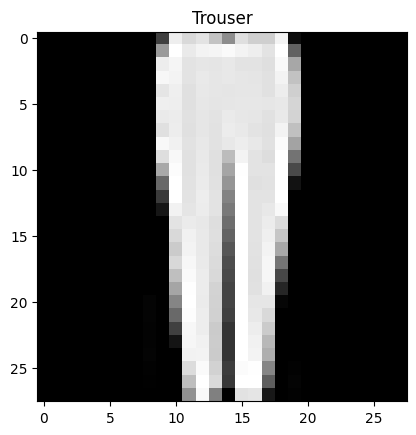

In [18]:
train_features_batch[9][0,:,:],train_labels_batch[5]
plt.imshow(train_features_batch[4][0,:,:], cmap= "gray")
plt.title(class_names[train_labels_batch[4]])

In [19]:
# To flatten the input we will use nn.flatten
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [20]:
from torch.nn.modules.flatten import Flatten
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=input_shape, out_features=hidden_units),
                                     nn.Linear(in_features=hidden_units, out_features=output_shape)
                                     )
  def forward(self,x):
    return self.layer_stack(x)

In [37]:
device = "cpu"

In [38]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape = 784,
                               hidden_units=10,
                               output_shape=len(class_names)).to("cpu")

In [39]:
#test the model
dummy_x = torch.randn([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [40]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import sys
path = '/content/drive/MyDrive/PyTorchTraining/'
sys.path.insert(0, path)
import helper_functions as hlpfnc

In [42]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(),lr = 0.1 )

In [43]:
from timeit import default_timer as timer

In [44]:
def print_train_time(start:float, end:float, device: torch.device = None):
  total_time = end - start
  print(f"Total time elapsed on {device}:{total_time} seconds")
  return


Creating a training loop and training a model on batches of data
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calcula he test loss per batch.
4. Print out what's happening.
5. Time it all (for fun).

In [45]:
from torch.nn.modules import loss
from tqdm.auto import tqdm
torch.manual_seed(42)

In [46]:



train_time_start_on_cpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch+1}\n----")
  train_loss,train_acc = 0,0
  for batch,(X_train,y_train) in enumerate(train_dataloader):

    model_0.train() # put the model in to the training mode

    #do the forward pass
    y_pred = model_0(X_train)

    # calculate the loss
    loss = loss_fn(y_pred,y_train)
    train_loss += loss # accumalate train loss
    train_acc += hlpfnc.accuracy_fn(y_true = y_train, y_pred = y_pred.argmax(dim=1))

    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward - calculating the gradients
    loss.backward()

    #update the weights
    optimizer.step()

    if batch % 800 == 0:
      print(f"Looked at {batch * len(X_train)}/{len(train_dataloader.dataset)} samples.")

  train_loss /= len(train_dataloader) # averaging out the acumulated values
  train_acc /= len(train_dataloader)

  test_loss, test_acc = 0, 0

  model_0.eval()# put the model in to the evaluation mode before testing starts

  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += hlpfnc.accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader) # averaging out the acumulated values

  print(f"\nLoss: {train_loss:.5f} , Train acc: {train_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()
print_train_time(train_time_start_on_cpu, train_time_end_on_cpu, device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:1
----
Looked at 0/60000 samples.
Looked at 25600/60000 samples.
Looked at 51200/60000 samples.

Loss: 0.59039 , Train acc: 79.17% | Test loss: 0.50954, Test acc: 82.04%

Epoch:2
----
Looked at 0/60000 samples.
Looked at 25600/60000 samples.
Looked at 51200/60000 samples.

Loss: 0.47633 , Train acc: 83.32% | Test loss: 0.47989, Test acc: 83.20%

Epoch:3
----
Looked at 0/60000 samples.
Looked at 25600/60000 samples.
Looked at 51200/60000 samples.

Loss: 0.45503 , Train acc: 84.05% | Test loss: 0.47664, Test acc: 83.43%

Epoch:4
----
Looked at 0/60000 samples.
Looked at 25600/60000 samples.
Looked at 51200/60000 samples.

Loss: 0.44251 , Train acc: 84.47% | Test loss: 0.46306, Test acc: 83.75%

Epoch:5
----
Looked at 0/60000 samples.
Looked at 25600/60000 samples.
Looked at 51200/60000 samples.

Loss: 0.43582 , Train acc: 84.70% | Test loss: 0.46869, Test acc: 83.27%

Total time elapsed on cpu:53.6888134790006 seconds


In [31]:
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [47]:
model_0_results = eval_model(model=model_0, data_loader= test_dataloader,
    loss_fn=loss_fn, accuracy_fn=hlpfnc.accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46869373321533203,
 'model_acc': 83.2667731629393}

In [48]:
device = "cuda" if torch.cuda.is_available else "cpu"

In [49]:
from torch.nn.modules.flatten import Flatten
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=input_shape, out_features=hidden_units),
                                     nn.ReLU(),
                                     nn.Linear(in_features=hidden_units, out_features=output_shape),
                                     nn.ReLU(),
                                     )
  def forward(self,x):
    return self.layer_stack(x)

In [50]:
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=8,
                              output_shape=len(class_names)).to(device)

In [51]:
model_1.parameters()

<generator object Module.parameters at 0x7d21e37d38b0>

In [52]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X = X.to(device)
            y = y.to(device)
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}



In [53]:
def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              optimizer: torch.optim.Optimizer,
              loss: torch.nn.Module,
              device : torch.device = device):
  model.train() # put the model in to the training mode

  train_loss,train_acc = 0,0
  for batch,(X_train,y_train) in enumerate(train_dataloader):
    X_train = X_train.to(device)
    y_train = y_train.to(device)

    #do the forward pass
    y_pred = model(X_train)

    # calculate the loss
    loss = loss_fn(y_pred,y_train)
    train_loss += loss # accumalate train loss
    train_acc += hlpfnc.accuracy_fn(y_true = y_train,
                                    y_pred = y_pred.argmax(dim=1)) # go from logits -> prediction labels

    #optimizer zero grad
    optimizer.zero_grad()

    #loss backward - calculating the gradients
    loss.backward()

    #update the weights
    optimizer.step()

  train_loss /= len(data_loader) # averaging out the acumulated values
  train_acc /= len(data_loader)
  print(f"\n Train Loss: {train_loss:.5f} , Train acc: {train_acc:.2f}% ")


In [54]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              optimizer: torch.optim.Optimizer,
              loss: torch.nn.Module,
              device : torch.device = device):

  test_loss, test_acc = 0, 0
  model.eval()# put the model in to the evaluation mode before testing starts

  with torch.inference_mode():
    for X_test,y_test in data_loader:
      X_test,y_test = X_test.to(device) , y_test.to(device)
      test_pred = model(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += hlpfnc.accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader) # averaging out the acumulated values

  print(f"\n Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
  return


In [55]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_1.parameters(),lr = 0.1 )

In [56]:
train_time_start_on_gpu = timer()

epochs = 5
results = {}
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model= model_1,
            data_loader=train_dataloader,
            optimizer= optimizer,
            loss = loss_fn,
            device = device)
  results = test_step(model= model_1,
            data_loader=test_dataloader,
            optimizer= optimizer,
            loss = loss_fn,
            device = device)


train_time_end_on_gpu = timer()
print_train_time(train_time_start_on_gpu, train_time_end_on_gpu, device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----

 Train Loss: 1.04461 , Train acc: 65.21% 

 Test loss: 0.95177, Test acc: 66.85%

Epoch: 1
-----

 Train Loss: 0.91378 , Train acc: 68.47% 

 Test loss: 0.91940, Test acc: 68.34%

Epoch: 2
-----

 Train Loss: 0.88647 , Train acc: 69.02% 

 Test loss: 0.92139, Test acc: 68.33%

Epoch: 3
-----

 Train Loss: 0.75205 , Train acc: 73.05% 

 Test loss: 0.71330, Test acc: 74.39%

Epoch: 4
-----

 Train Loss: 0.67885 , Train acc: 75.09% 

 Test loss: 0.70572, Test acc: 74.22%

Total time elapsed on cuda:52.87593662400013 seconds


In [57]:
model_1_result = eval_model(model=model_1, data_loader= test_dataloader,
    loss_fn=loss_fn, accuracy_fn=hlpfnc.accuracy_fn)
model_1_result

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.7057155966758728,
 'model_acc': 74.22124600638978}

In [58]:
len(class_names)

10

In [59]:
class CNN(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(nn.Conv2d(in_channels=input_shape,
                                              out_channels=hidden_units,
                                              kernel_size=3,
                                              stride=1,# take a step one pixel at a time
                                              padding=1), # add an extra pixel aroun the input image

                                    nn.ReLU(),
                                    nn.Conv2d(in_channels=hidden_units,
                                              out_channels=hidden_units,
                                              kernel_size=3,
                                              stride=1,# take a step one pixel at a time
                                              padding=1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2))

    self.conv_block_2 = nn.Sequential(nn.Conv2d(in_channels=hidden_units,
                                              out_channels=hidden_units,
                                              kernel_size=3,
                                              stride=1,# take a step one pixel at a time
                                              padding=1), # add an extra pixel aroun the input image
                                    nn.ReLU(),
                                    nn.Conv2d(in_channels=hidden_units,
                                              out_channels=hidden_units,
                                              kernel_size=3,
                                              stride=1,# take a step one pixel at a time
                                              padding=1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2))
    self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features= hidden_units*7*7, out_features= output_shape),
                                    )

  def forward(self,X):
    X = self.conv_block_1(X)
    # print(f"Output shape of conv_block_1: {X.shape}")
    X = self.conv_block_2(X)
    # print(f"Output shape of conv_block_2: {X.shape}")
    X = self.classifier(X)
    # print(f"Output shape of classifier: {X.shape}")
    return X

In [60]:
model_2 = CNN(input_shape = 1,
              hidden_units = 10,
              output_shape = len(class_names)).to(device)
model_2

CNN(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [61]:
X_train.shape, X_train[0].shape

(torch.Size([32, 1, 28, 28]), torch.Size([1, 28, 28]))

In [62]:
conv_layer = nn.Sequential(nn.Conv2d(in_channels= 1,
                                      out_channels=8,
                                              kernel_size=(3,3),
                                              stride=1,# take a step one pixel at a time
                                              padding=1)) # add an extra pixel aroun the input image

In [63]:
conv_layer(X_train[0]).shape

torch.Size([8, 28, 28])

In [64]:
max_layer = nn.MaxPool2d(kernel_size=2)

In [65]:
max_layer(conv_layer(X_train[0])).shape

torch.Size([8, 14, 14])

In [66]:
model_2(X_train[0].unsqueeze(0).to(device))

tensor([[-0.0142, -0.0367, -0.0081, -0.0269,  0.0128, -0.0316,  0.0223,  0.0445,
         -0.0324,  0.0542]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [67]:
inp = torch.rand([1, 10, 7, 7])
out = nn.Flatten()
out(inp).size()

torch.Size([1, 490])

In [68]:
inp.size()[1]*inp.size()[2]*inp.size()[3]

490

In [69]:
out2 = nn.Linear(in_features=490,
          out_features=1)
out2(out(inp))

tensor([[-0.2936]], grad_fn=<AddmmBackward0>)

In [70]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_2.parameters(),lr = 0.1 )

In [71]:
rain_time_start_on_gpu_CNN = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_2,
            data_loader=train_dataloader,
            optimizer=optimizer,
            loss=loss_fn,
            device=device)
  test_pred = test_step(model=model_2,
            data_loader=test_dataloader,
            optimizer=optimizer,
            loss=loss_fn,
            device=device)


train_time_end_on_gpu_CNN = timer()
print_train_time(rain_time_start_on_gpu_CNN, train_time_end_on_gpu_CNN, device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----

 Train Loss: 0.71765 , Train acc: 73.57% 

 Test loss: 0.41679, Test acc: 84.66%

Epoch: 1
-----

 Train Loss: 0.37430 , Train acc: 86.35% 

 Test loss: 0.38060, Test acc: 85.84%

Epoch: 2
-----

 Train Loss: 0.33119 , Train acc: 88.07% 

 Test loss: 0.34166, Test acc: 87.78%

Epoch: 3
-----

 Train Loss: 0.30415 , Train acc: 88.93% 

 Test loss: 0.31931, Test acc: 88.11%

Epoch: 4
-----

 Train Loss: 0.28697 , Train acc: 89.59% 

 Test loss: 0.33005, Test acc: 87.61%

Total time elapsed on cuda:77.70887038399997 seconds


In [72]:
model_2_results = eval_model(model=model_2, data_loader= test_dataloader,
    loss_fn=loss_fn, accuracy_fn=hlpfnc.accuracy_fn)
model_2_results

{'model_name': 'CNN',
 'model_loss': 0.3300483226776123,
 'model_acc': 87.60982428115015}

In [104]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_result, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.468694,83.266773
1,FashionMNISTModelV1,0.705716,74.221246
2,CNN,0.330048,87.609824


<Axes: xlabel='model_name'>

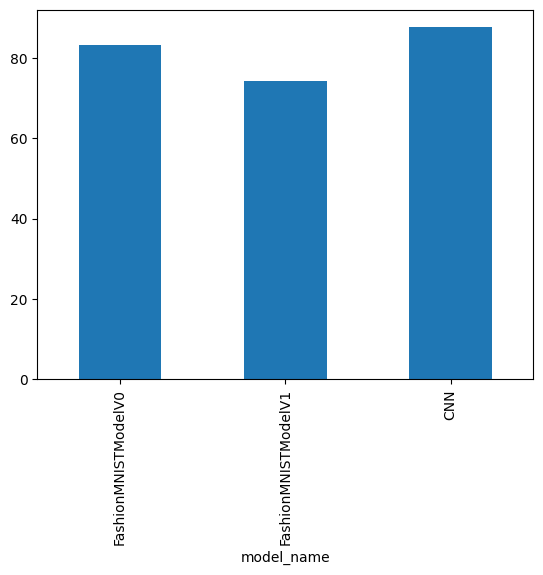

In [110]:

compare_results.set_index("model_name")["model_acc"].plot(kind="bar")